### Environment Set Up

In [35]:
# data manipulation
import pandas as pd
import numpy as np

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# pipeline construction
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA


# data processing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder

# models trainng
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

# models validation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# remove annoying warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_raw = sns.load_dataset('titanic')
df_raw.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# shuffle data is a good practice
df_raw = df_raw.sample(frac=1).reset_index(drop=True)
df_raw.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,51.0,0,0,7.7500,S,Third,man,True,NaN,Southampton,no,True
1,0,3,female,NaN,3,1,25.4667,S,Third,woman,False,NaN,Southampton,no,False
2,1,2,female,50.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
3,0,2,male,29.0,1,0,27.7208,C,Second,man,True,NaN,Cherbourg,no,False
4,0,3,female,8.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False


In [4]:
df_raw.shape

(891, 15)

In [93]:
#split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(df_raw.drop('survived', axis=1),
                                                   df_raw['survived'], #target column
                                                   test_size=0.2,
                                                   stratify=df_raw['survived'], #dla danych niezbalansowanych - jeżeli dane są niezbalansowane czyli część danych jest częstsza niż inne to dostaniemy dane w próbce w tej samej proporcji jak w oryginalnym datasecie
                                                   random_state=42)

### Basic Exploratory Data Analysis

In [7]:
#column type
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [8]:
#basic statistics - describe() wyciaga tylko columny numeryczne
df_raw.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Unique values per column

In [9]:
for column in df_raw:
    print(f'{column} - {len(df_raw[column].unique())}')
    print(df_raw[column].unique())
    print()

survived - 2
[0 1]

pclass - 3
[3 2 1]

sex - 2
['male' 'female']

age - 89
[51.     nan 50.   29.    8.   32.   35.   18.   38.   42.   16.   20.
 48.   31.   37.   21.   27.   30.   19.   40.   22.   52.   45.   28.
  0.75 54.   26.   62.   39.    2.   43.   23.   55.   11.    9.   46.
 32.5  17.   41.   34.   28.5   0.83 63.   47.   60.   45.5  24.    3.
  5.    4.   61.   49.   33.   56.   23.5  36.   30.5  15.    1.   40.5
 55.5  44.   25.   36.5  20.5   7.   58.   65.   71.   57.   14.5  14.
 53.    6.   10.    0.92 24.5  80.   34.5  59.   70.5   0.42 12.   64.
 74.   70.   13.    0.67 66.  ]

sibsp - 7
[0 3 1 2 4 8 5]

parch - 7
[0 1 5 6 2 3 4]

fare - 248
[  7.75    25.4667  26.      27.7208  21.075   13.     146.5208  15.1
  53.1     20.2125 512.3292   7.05     7.7333   8.6625  25.9292  10.5
  29.7     73.5      7.2292   7.8958  86.5     14.5     15.75     7.125
  13.5      9.5875  39.4     26.25    14.4     19.2583  51.8625  18.7875
 227.525   31.275    8.05    46.9      7.55

### Missing values

In [13]:
a = df_raw.isna().mean()*100
a[a>0]

# jeżeli jest poniżej 20% to warto zostawić jeżeli powyżej to bardziej sie oplaca ja usunac

age            19.865320
embarked        0.224467
deck           77.216611
embark_town     0.224467
dtype: float64

In [12]:
a = df_raw.isna().sum()
a[a>0]

age            177
embarked         2
deck           688
embark_town      2
dtype: int64

### Distributions

In [14]:
numeric_columns = df_raw.select_dtypes(include=np.number).columns
numeric_columns

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

In [15]:
non_numeric_columns = df_raw.select_dtypes(exclude=np.number).columns
numeric_columns

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

### Numeric columns

Column: survived
Unique values: 2


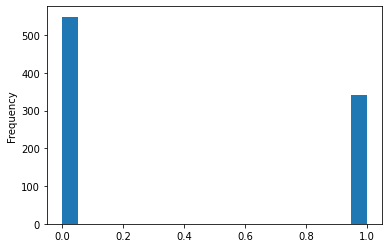

Column: pclass
Unique values: 3


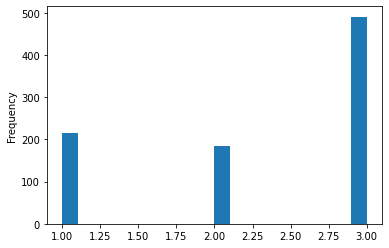

Column: age
Unique values: 89


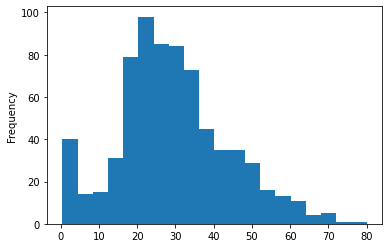

Column: sibsp
Unique values: 7


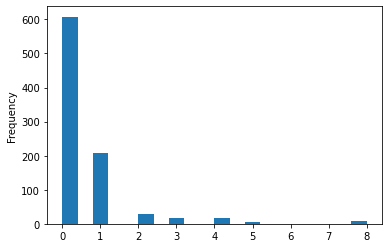

Column: parch
Unique values: 7


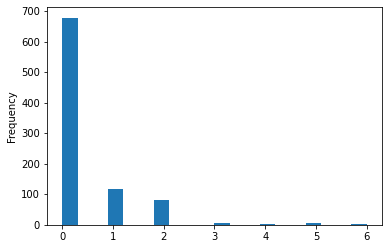

Column: fare
Unique values: 248


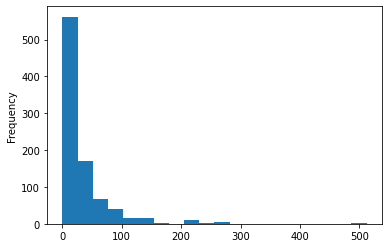

In [17]:
for column in numeric_columns:
    print(f'Column: {column}')
    print(f'Unique values: {len(df_raw[column].unique())}')
    df_raw[column].plot.hist(bins=20)
    plt.show()

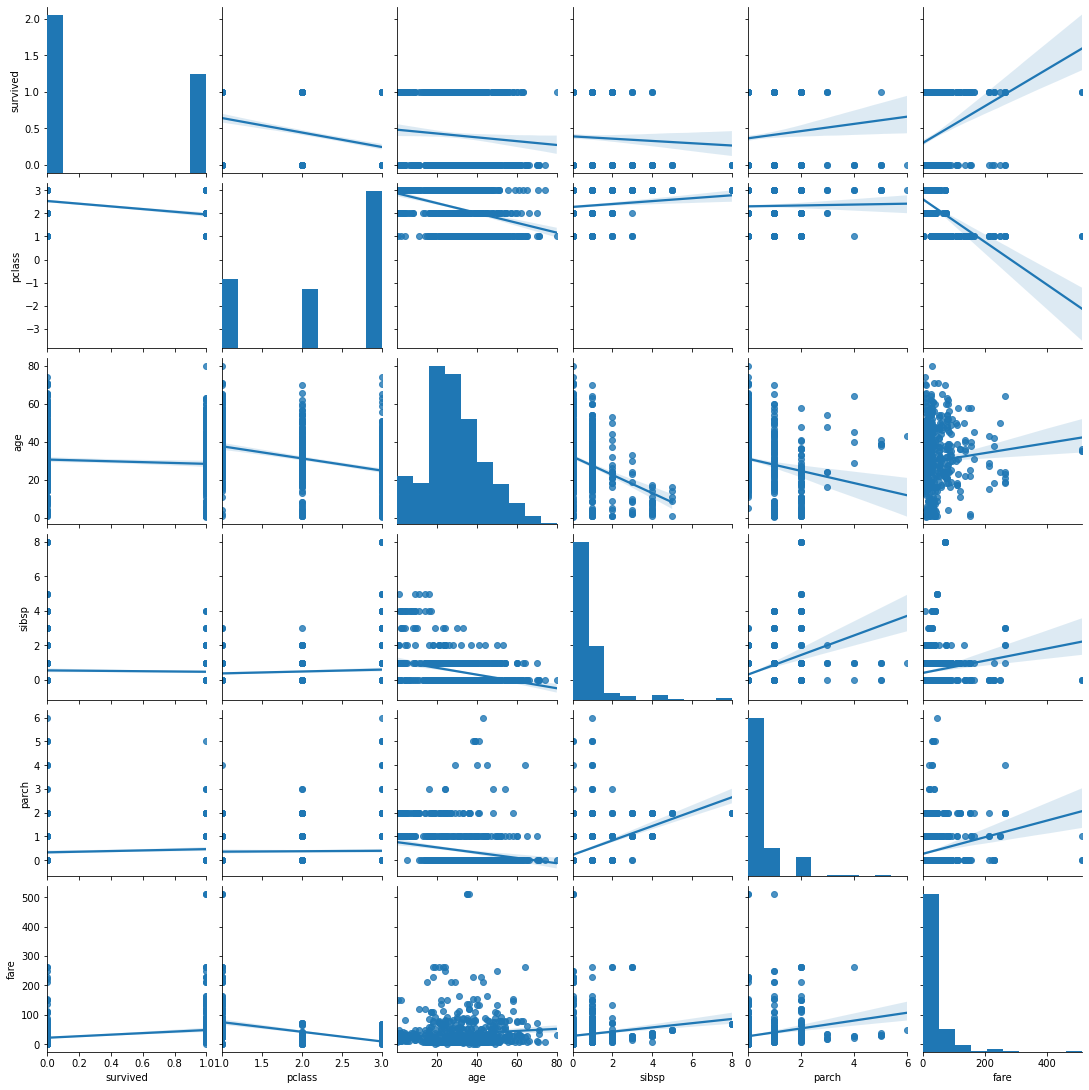

In [18]:
# mututal dependencies
df_numeric = df_raw.select_dtypes(include=np.number)
sns.pairplot(df_numeric, kind='reg')
plt.show()

### Categorical columns


Column: sex
Unique values: 2


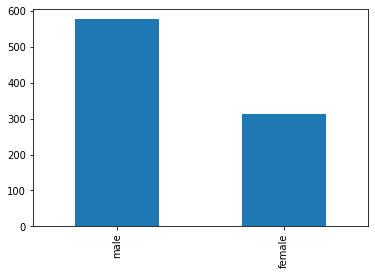

Column: embarked
Unique values: 4


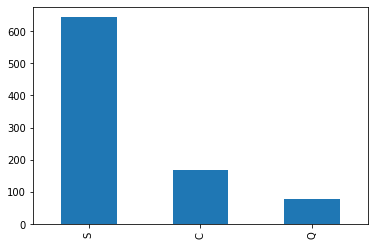

Column: class
Unique values: 3


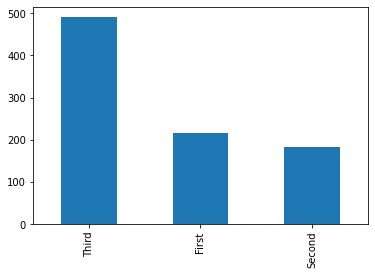

Column: who
Unique values: 3


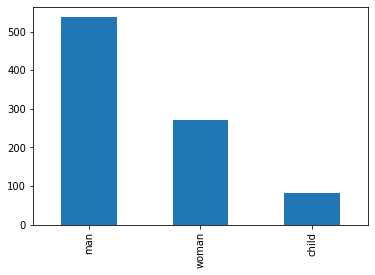

Column: adult_male
Unique values: 2


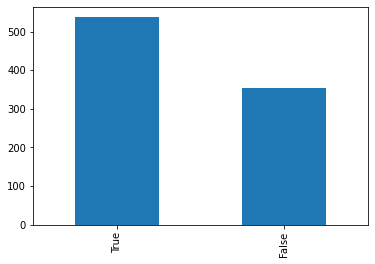

Column: deck
Unique values: 8


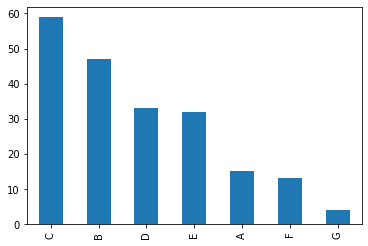

Column: embark_town
Unique values: 4


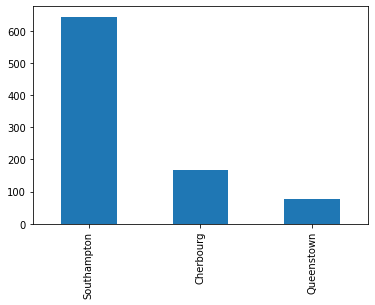

Column: alive
Unique values: 2


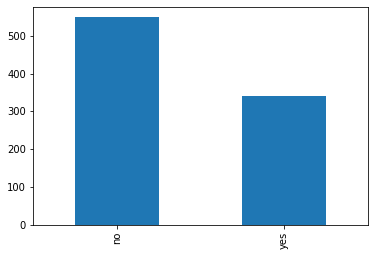

Column: alone
Unique values: 2


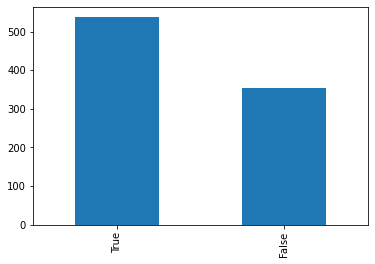

In [19]:
for column in non_numeric_columns:
    print(f'Column: {column}')
    print(f'Unique values: {len(df_raw[column].unique())}')
    df_raw[column].value_counts().plot.bar()
    plt.show()

In [21]:
df_raw.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,51.0,0,0,7.7500,S,Third,man,True,NaN,Southampton,no,True
1,0,3,female,NaN,3,1,25.4667,S,Third,woman,False,NaN,Southampton,no,False


### Conclusions
* there are duplicated columns - survived and alive, pclass and class, embark and embark town: **to be removed**
* there are columns with too many missing values: 'deck. 'Age can be kept and imputed
* numeric columns are skewed. For linear algorithms it ca be a problem. Log or Yeo Jonson transformation may help
* binary column 'alone' should be truned to 0-1
* categorical columns should be encoded using one - hot encoding

#### Consider:
* 'who' can be truned to 'adult' and 'child' => 'adult_male' can be then removed as a reduntant one
* on to remove 'deck' with new category e.g. 'Missing'
* create new features (multiplication of class and sex; multiplication of sex and age)

## Simplest Pipeline

In [22]:
# data
X_1 = pd.DataFrame(df_raw['pclass']) # dlatego dataframe bo na Series nie da się trenować
y_1 = df_raw['survived']

# steps of the pipeline

steps = [
    ('scaler', MinMaxScaler()), # pierszy element krotki to dowolna własna nazwa - 'scaler' bo sobie będę skalował
    # if the pipeline has the model, it MUST be the last step
    ('model', LogisticRegression())
    
    # however, the pipeline can be only for features transforming, not for prediction
]

# pipeline definition
pipeline_1 = Pipeline(steps=steps)

#pipeline training / fitting
pipeline_1.fit(X_1, y_1)

preds = pipeline_1.predict(X_1)
preds[:5]

array([0, 0, 0, 0, 0])

In [23]:
# pipeline evaluation
pipeline_1.score(X_1, y_1)

0.6790123456790124

In [24]:
pipeline_1.get_params() # dostajemy się do wszystkich paramteerów jakie mamay w pipeline

{'memory': None,
 'steps': [('scaler', MinMaxScaler()), ('model', LogisticRegression())],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'model': LogisticRegression(),
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'model__C': 1.0,
 'model__class_weight': None,
 'model__dual': False,
 'model__fit_intercept': True,
 'model__intercept_scaling': 1,
 'model__l1_ratio': None,
 'model__max_iter': 100,
 'model__multi_class': 'auto',
 'model__n_jobs': None,
 'model__penalty': 'l2',
 'model__random_state': None,
 'model__solver': 'lbfgs',
 'model__tol': 0.0001,
 'model__verbose': 0,
 'model__warm_start': False}

In [25]:
pipeline_1.named_steps

{'scaler': MinMaxScaler(), 'model': LogisticRegression()}

In [26]:
pipeline_1.named_steps['scaler']

MinMaxScaler()

In [27]:
pipeline_1.steps

[('scaler', MinMaxScaler()), ('model', LogisticRegression())]

# Task 1 - data transformation

* as a features, take class and fare
* Add Standard Scaler
* Add PCA step to the pipeline with the only component
* Show transformed features

# Task 2 - prediction

* as a features, take class and fare
* add Standard Scaler
* add PCA step to the pipeline with the only component
* add the estimator at the end of the pipeline
* Evaluate the model

In [43]:
# data transforation
from sklearn.decomposition import PCA

X_2 = df_raw[['pclass', 'fare']] # dlatego dataframe bo na Series nie da się trenować
y_2 = df_raw['survived']

# steps of the pipeline

steps = [
    ('scaler', StandardScaler()), # pierszy element krotki to dowolna własna nazwa - 'scaler' bo sobie będę skalował
    # if the pipeline has the model, it MUST be the last step
    ('pca', PCA(1)),

    
    # however, the pipeline can be only for features transforming, not for prediction
]

# pipeline definition
pipeline_2 = Pipeline(steps=steps)

#pipeline training / fitting
pipeline_2.fit(X_2, y_2)
pipeline_2.transform(X_2)[:5]


array([[-0.93320776],
       [-0.68096848],
       [ 0.17284876],
       [ 0.19734843],
       [-0.74349475]])

In [44]:
# prediction
step = [
    ('scaler', StandardScaler),
    ('pca', PCA(1)),
    ('model', LogisticRegression())
]

pipeline_2= Pipeline(steps=steps)
pipeline_2.fit(X_2, y_2)

pipeline_2.score(X_2, y_2)

-2.6581455440316315

## Custom Transformers
* allows to implement any logic on features
* can be included as a step into the pipeline

### Transformer for removing columns from the dataset
* no fit method implementation

In [45]:
# transformer mus be defined as a class
# implementing two methods: fit and transform

class RemoveColumnsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_remove: list):
        self.columns_to_remove = columns_to_remove
        
    # even if nothing to fit, this method must return self
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        return X.drop(self.columns_to_remove, axis=1)

In [47]:
# define test dataset
X_2 = df_raw[['pclass', 'fare']]

# initialize the transformer
rc = RemoveColumnsTransformer(columns_to_remove=['fare'])

# fit and transform transformer
rc.fit(X_2)
transformed_df = rc.transform(X_2)
transformed_df.head()

,pclass
0,3
1,3
2,2
3,2
4,3


### Task 3
* create custom transformer SelectColumnsTransformer which can select spefied columns from the dataset
* return pclass and fare

In [48]:
class SelectColumnsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_select: list):
        self.columns_to_select = columns_to_select
        
    # even if nothing to fit, this method must return self
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        return X[self.columns_to_select]

In [49]:
X_3 = df_raw
sc = SelectColumnsTransformer(columns_to_select=['pclass', 'fare'])

sc.fit(X_3)
transformed_df = sc.transform(X_3)
transformed_df.head()

,pclass,fare
0,3,7.7500
1,3,25.4667
2,2,26.0000
3,2,27.7208
4,3,21.0750


### Task 3.1
* create transformer SelectColumnsByTypeTransformer which can select columns by type - 'numeric' or 'object'

In [57]:
class SelectColumnsByTypeTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, type_to_select):
        self.type_to_select = type_to_select
        
    # even if nothing to fit, this method must return self
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        if self.type_to_select == 'numeric':
            return X.select_dtypes(include = np.number)
        else:
            return X.select_dtypes(exclude=np.number)

In [59]:
X_3 = df_raw
sc = SelectColumnsByTypeTransformer(type_to_select='object')

sc.fit(X_3)
transformed_df = sc.transform(X_3)
transformed_df.head()

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,male,S,Third,man,True,NaN,Southampton,no,True
1,female,S,Third,woman,False,NaN,Southampton,no,False
2,female,S,Second,woman,False,NaN,Southampton,yes,False
3,male,C,Second,man,True,NaN,Cherbourg,no,False
4,female,S,Third,child,False,NaN,Southampton,no,False


### Transformer for missing data imputation
* fit method implemetation

In [60]:
class ImputeNumColsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, method='mean'):
        self.method = method
        # for keeping values to impute any specified column
        self.impute_values = {}
    
    def fit(self, X, y = None):
        if self.method == 'mean':
            for col in X:
                mean = X[col].mean()
                self.impute_values[col] = mean
        return self
    
    def transform(self, X, y = None):
        for col in X:
            value_to_impute = self.impute_values[col]
            X[col] = X[col].fillna(value_to_impute)
        return X

In [61]:
# testing data with missing values
X_4 = df_raw[['pclass', 'age']]
X_4.isna().mean()

pclass    0.000000
age       0.198653
dtype: float64

In [62]:
# fitting imputer
imputer = ImputeNumColsTransformer()
imputer.fit(X_4)

ImputeNumColsTransformer()

In [63]:
imputer.impute_values

{'pclass': 2.308641975308642, 'age': 29.69911764705882}

In [65]:
# transforming columns => as a result we except no missing values in the columns
X_4_filled = imputer.transform(X_4)
X_4_filled.isna().sum()

pclass    0
age       0
dtype: int64

### Task 4
* extent the ImputeNumColsTransformer so that numeric column can be imputed by **median** value

In [68]:
class ImputeNumColsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, method='mean'):
        self.method = method
        # for keeping values to impute any specified column
        self.impute_values = {}
    
    def fit(self, X, y = None):
        if self.method == 'mean':
            for col in X:
                mean = X[col].mean()
                self.impute_values[col] = mean
        elif self.method == 'median':
            for col in X:
                median = X[col].median()
                self.impute_values[col] = median
        return self
    
    def transform(self, X, y = None):
        for col in X:
            value_to_impute = self.impute_values[col]
            X[col] = X[col].fillna(value_to_impute)
        return X

In [70]:
X_5 = df_raw[['pclass', 'age']]
X_5.isna().mean()

pclass    0.000000
age       0.198653
dtype: float64

In [71]:
imputer = ImputeNumColsTransformer(method='median')
imputer.fit(X_5)
imputer.impute_values

{'pclass': 3.0, 'age': 28.0}

### Task 5
* implement ImputeCatColsTransformer for imputing missing values for categorical columns
* there are two options for imputing: by mode or my new category 'missing'

In [82]:
class ImputeCatColsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, method='mode'):
        self.method = method
        self.imputed_values = {}
        
    def fit(self, X, y=None):
        if self.method == 'mode':
            for col in X:
                mode = X[col].mode()
                self.imputed_values[col] = mode[0]
        elif self.method == 'missing':
            for col in X:
                self.imputed_values[col] = 'missing'
        return self
    
    def transform(self, X, y=None):
        for col in X:
            value_to_impute = self.imputed_values[col]
            X[col] = X[col].astype('object')
            X[col] = X[col].fillna(value_to_impute)
        return X

SelectColumnsByTypeTransformer(type_to_select='object')

In [76]:
transformed_df

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,male,S,Third,man,True,NaN,Southampton,no,True
1,female,S,Third,woman,False,NaN,Southampton,no,False
2,female,S,Second,woman,False,NaN,Southampton,yes,False
3,male,C,Second,man,True,NaN,Cherbourg,no,False
4,female,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...
886,male,S,First,man,True,C,Southampton,yes,True
887,male,C,First,man,True,A,Cherbourg,yes,False
888,female,S,Third,child,False,NaN,Southampton,no,False
889,male,C,First,man,True,B,Cherbourg,yes,False


In [84]:
imputer = ImputeCatColsTransformer(method='missing')
imputer.fit(transformed_df)
imputer.imputed_values

{'sex': 'missing',
 'embarked': 'missing',
 'class': 'missing',
 'who': 'missing',
 'adult_male': 'missing',
 'deck': 'missing',
 'embark_town': 'missing',
 'alive': 'missing',
 'alone': 'missing'}

In [85]:
X_transformed = imputer.transform(transformed_df)
X_transformed.isna().sum()

sex            0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

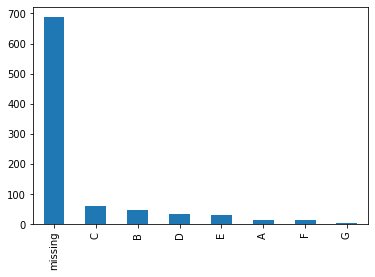

In [86]:
X_transformed['deck'].value_counts().plot.bar()

## Not So Simple Pipeline
* take only numeric columns
* fill missing values by median
* scale with standard scaler 
* reduce dimensionality
* train model
* evaluate

In [95]:
steps = [
    ('selector', SelectColumnsByTypeTransformer(type_to_select='numeric')),
    ('imputer', ImputeNumColsTransformer(method='median')),
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('model', LogisticRegression())
]

pipeline_2 = Pipeline(steps=steps)
pipeline_2.fit(X_train, y_train)
pipeline_2.predict(X_test)
pipeline_2.score(X_test, y_test)

0.6703910614525139

### Task 6
* create a pipeline:
* select two columns - ages and class
* impute missing data with mean
* scale data with MinMaxScaler
* reduce dimensionality to 2 dimensions
* train the model

In [96]:
steps = [
    ('selector', SelectColumnsTransformer(['pclass', 'age'])),
    ('imputer', ImputeNumColsTransformer(method='mean')),
    ('scaler', MinMaxScaler()),
    ('pca', PCA(2)),
    ('model', LogisticRegression())
]
pipeline_3 = Pipeline(steps=steps)
pipeline_3.fit(X_train, y_train)
pipeline_3.score(X_test, y_test)

0.6983240223463687

### Feature Union

#### Pipeline structure using Feature Union and custom transformers

1. Remove unnecesarry or reduntandt columns
2. Divide all columns inot groups with similar handling procedured: ** categorical columns, numerical columns


For categorical columns:
* imput missing values
* scale data


### Utility


In [97]:
# result of FeatureUnion is numpy array => turn back to pandas dataframe to enhance readability

def make_df(array, columns):
    return pd.DataFrame(array, columns=columns)

#### How to combine pipelines together?

In [98]:
numeric_columns = ['pclass', 'age']
cat_columns = ['sex', 'embarked']

#### Numerical pipeline

In [106]:
num_steps = [('select_num_columns', SelectColumnsTransformer(numeric_columns))]
num_pipeline = Pipeline(steps=num_steps)
num_pipeline.transform(df_raw).head()

,pclass,age
0,3,51.0
1,3,NaN
2,2,50.0
3,2,29.0
4,3,8.0


#### Categorical Pipeline


In [105]:
cat_steps = [('select_num_columns', SelectColumnsTransformer(cat_columns))]
cat_pipeline = Pipeline(steps=cat_steps)
cat_pipeline.transform(df_raw).head()

,sex,embarked
0,male,S
1,female,S
2,female,S
3,male,C
4,female,S


### Combine two pipelines into single bigger one

In [107]:
#list of pipelines
#in our case we have to: numeric and cat. Can be more
transformer_list = [
    ('categorical_pipeline', cat_pipeline),
    ('numerical_pipeline', num_pipeline)
]

# list of pipelines is passed to FeatureUnion
combined_pipeline = FeatureUnion(transformer_list=transformer_list)

# the result will be 4 columns => firstly 2 cat columns , then 2 numeric columns

df_combined = combined_pipeline.fit_transform(df_raw)
df_combined

array([['male', 'S', 3.0, 51.0],
       ['female', 'S', 3.0, nan],
       ['female', 'S', 2.0, 50.0],
       ...,
       ['female', 'S', 3.0, 6.0],
       ['male', 'C', 1.0, 25.0],
       ['male', 'S', 3.0, 4.0]], dtype=object)

In [108]:
combined_pipeline.fit(X_train)
combined_pipeline.transform(X_test)[:5]

array([['male', 'S', 3.0, nan],
       ['male', 'S', 2.0, 54.0],
       ['male', 'Q', 3.0, nan],
       ['male', 'S', 2.0, 23.0],
       ['female', 'C', 1.0, 39.0]], dtype=object)

'combined_pipeline' can be used then as a step in the pipeline with estimator:
- 1 step - combined_pipeline
- 2 step - estimator (e.g. Logisitic regression)

### Task 7
* the first pipeline for numeric columns: age, pclass
* the secodn pipeline for categorical columns: sex, embarked
* numeric pipeline does: feature selection, missing values imputation by median, scaling, dimensionality reduction
* categorical pipieline does: fetature selection, missing values imputation, one hot encoding
* two subsets are combined togherer using FeatureUnion
* final dataset is used to trani the logistic regression model => new pipeline containing two steps: feature union and logistic regression 
* evaluate the model

**NOTE:**
1. OneHotEncoder(sparse=False,handle_unknown='ignore')
2. Pipeline shoul be fitted on X_train, y_train and validated on X_test, y_test

In [110]:
steps_numeric_pipeline = [
    ('select_num_columns', SelectColumnsTransformer(numeric_columns)),
    ('missing_values_imput', ImputeNumColsTransformer(method='median')),
    ('scaling', MinMaxScaler()),
    ('pca', PCA(2))
]

steps_cat_pipeline = [
    ('select_cat_columns', SelectColumnsTransformer(cat_columns)),
    ('missing_values_imput', ImputeCatColsTransformer(method='mode')),
    ('encoding', OneHotEncoder(sparse=False, handle_unknown='ignore'))
]

num_pipeline = Pipeline(steps_numeric_pipeline)
cat_pipeline = Pipeline(steps_cat_pipeline)

transformer_list = [
    ('categorical_pipeline', cat_pipeline),
    ('numeric_pipeline', num_pipeline)
]

combined_pipeline = FeatureUnion(transformer_list)

final_pipeline = Pipeline(steps= [
    ('combined_pipeline', combined_pipeline),
    ('log_reg', LogisticRegression())
])

final_pipeline.fit(X_train, y_train)

final_pipeline.score(X_test, y_test)

0.776536312849162

In [111]:
final_pipeline.predict(X_test)

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0])

## Columns Transformer

In [113]:
# numeric pipeline
numeric_columns = ['pclass', 'age', 'sibsp', 'parch', 'fare']
numeric_transform = Pipeline(steps=[
    #SimpleImputer is ready to use class from sklearn
    ('impute_num_columns', SimpleImputer(strategy='mean')),
    ('scale_data', MinMaxScaler())
])

# categorical pipeline
cat_columns = ['sex', 'embarked', 'who', 'alone']
categorical_transformer = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])

# transformer = numerical + categorical
transformer = ColumnTransformer(transformers=[
    ('num', numeric_transform, numeric_columns),
    ('cat', categorical_transformer, cat_columns)
])

#final pipeline with model
pipeline = Pipeline(steps=[
    ('preprocessor', transformer),
    ('classifier', LogisticRegression())
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute_num_columns',
                                                                   SimpleImputer()),
                                                                  ('scale_data',
                                                                   MinMaxScaler())]),
                                                  ['pclass', 'age', 'sibsp',
                                                   'parch', 'fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown=

In [114]:
pipeline.score(X_test, y_test)

0.7988826815642458

In [116]:
preds = pipeline.predict(X_test)

metrics = [accuracy_score, precision_score, recall_score, f1_score]
metrics_name = ['Accuracy', 'Precission', 'Recall', 'F1']
for metric, name in zip(metrics, metrics_name):
    print(f'{name}: {round(metric(preds, y_test),3)}')

Accuracy: 0.799
Precission: 0.71
Recall: 0.754
F1: 0.731


In [118]:
df_raw.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,51.0,0,0,7.75,S,Third,man,True,NaN,Southampton,no,True


### Task 8
* implemnet transformer for log transformation (if value = 0 => else log of value)

In [119]:
class LogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y = None):
        return self
            
    
    def transform(self, X, y = None):
        def log_transform(x):
            return 0 if x == 0 else np.log(x)
        
        X = pd.DataFrame(X)
        for col in X:
            X[col] = X[col].apply(log_transform)
        return X

In [122]:
x_log = df_raw['fare'] # has zero values
log_transformer = LogTransformer()
log_transformer.fit(x_log)

LogTransformer()

In [123]:
log_transformer.transform(x_log)[:5]

,fare
0,2.047693
1,3.237372
2,3.258097
3,3.322183
4,3.048088


In [128]:
# outliers for 'age' column
age = df_raw['age']
iqr = np.nanpercentile(age, 75) - np.nanpercentile(age, 25)
lower, upper = (np.nanpercentile(age, 25) - 1.5 * iqr) , (np.nanpercentile(age, 75) + 1.5 * iqr)

lower, upper


(-6.6875, 64.8125)

In ther transformer's method fit, for each column of the dataset X it should learn two values: low and high
Next, in the transform method:
* if the value is higher than upper, make it equal to upper
* if the value is lower than lower, make it equal to lower

The values ccan be stored in the transformer's atrribute **self.boundaries** in the form like this

`{
'column_name_1': [lower_value_1, upper_value_1],
'column_name_2': [lower_value_2, upper_value_2],
...
}`

### Task 8.1 (optional)
* implement transformer for removing outliers from numeric columns

In [130]:
class RemoveOutliersTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.boundaries = {}
        
    def fit( self, X, y = None ):
        for col in X:
            iqr = np.nanpercentile(X[col], 75) - np.nanpercentile(X[col], 25)
            lower, upper = (np.nanpercentile(X[col], 25) - 1.5 * iqr), (np.nanpercentile(X[col], 75) + 1.5 * iqr)
            self.boundaries[col] = [lower, upper]
        return self
    
    def transform( self, X, y = None ):
        for col in X:
            # if values are smaller than lower, make them lower
            X.loc[X[col] < self.boundaries[col][0], col] = self.boundaries[col][0]
            # if values are bigger than upper, make them upper
            X.loc[X[col] > self.boundaries[col][1], col] = self.boundaries[col][1]
        return X

### Task 9
Using ColumnsTransformer, implement the pipeline:
* first sub_pipeline takes columns: fare, sibsp, parch
* transformations: missing values by median, removing outliers, logtranformation, scaling

* second sub_pipeline takes columns: age, pclass
* transformations: missing values by mean, scaling

* third sub_pipeline takes columns: sex, embarked, alone
* transformations: missing values by mode, OHE

* final pipeline to train using Logistic Regression

In [131]:
steps_sub_1 = [
    ('column_selection', SelectColumnsTransformer(['fare', 'sibsp', 'parch'])),
    ('missing_values', SimpleImputer(strategy='median')),
    ('removing_outliers', RemoveOutliersTransformer()),
    ('log_transformation', LogTransformer()),
    ('scaling', MinMaxScaler())
]

steps_sub_2 = [
    ('column_selection', SelectColumnsTransformer(['age', 'pclass'])),
    ('missing_values', SimpleImputer(strategy='mean')),
    ('scaling', MinMaxScaler())
]

steps_sub_3 = [
    
]

sub_pipeline_1 = Pipeline()

TypeError: __init__() missing 1 required positional argument: 'steps'

In [132]:
# sub_pipeline_1 implemented
cols_1 = ['fare', 'sibsp', 'parch']
transformer_1 = Pipeline(steps=[
    ('impute_num_columns', ImputeNumColsTransformer(method='median')),
    ('remove_outliers', RemoveOutliersTransformer()),
    ('log_transform', LogTransformer()),
    ('scale_data', MinMaxScaler())
])
# sub_pipeline_2 implemented
cols_2 = ['age', 'pclass']
transformer_2 = Pipeline(steps = [
    ('impute_num_columns', ImputeNumColsTransformer(method='mean')),
    ('scale_data', MinMaxScaler())
])
# sub_pipeline_3 implemented
cols_3 = ['sex', 'embarked', 'alone']
transformer_3 = Pipeline(steps = [
    ('impute_cat_columns', ImputeCatColsTransformer(method='mode')),
    ('ohe', OneHotEncoder(sparse=False ,handle_unknown='ignore'))
])
# transformer = numerical + categorical
transformer = ColumnTransformer(transformers=[
    ('num_1', transformer_1, cols_1),
    ('num_2', transformer_2, cols_2),
    ('cat_1', transformer_3, cols_3),
])
# final pipeline with model
pipeline = Pipeline(steps=[('preprocessor', transformer),
                      ('classifier', LogisticRegression())])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_1',
                                                  Pipeline(steps=[('impute_num_columns',
                                                                   ImputeNumColsTransformer(method='median')),
                                                                  ('remove_outliers',
                                                                   RemoveOutliersTransformer()),
                                                                  ('log_transform',
                                                                   LogTransformer()),
                                                                  ('scale_data',
                                                                   MinMaxScaler())]),
                                                  ['fare', 'sibsp', 'parch']),
                                                 ('num_2',
                                                  

In [134]:
pipeline.score(X_test, y_test)

0.776536312849162